In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [67]:
blend_of_12_models = pd.read_csv('submissions/blend_it_all.csv')
logreg = pd.read_csv('submissions/logreg_best.csv')
lineg = pd.read_csv('input/linear_regression/submission.csv')
nlp_cnn = pd.read_csv('input/nlp_using_cnn/submission.csv')
lazy = pd.read_csv('input/lazy/lazy_ensemble_submission.csv')
xgb = pd.read_csv('input/subm_xgb_glm/subm_xgb_glm.csv')
one_more = pd.read_csv('input/one_more_blend/one_more_blend.csv')
vic = pd.read_csv('input/Vic_nn/swa_2_runs_blend.csv')

labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
for label in labels:
    blend_of_12_models[label] = minmax_scale(blend_of_12_models[label])
    logreg[label] = minmax_scale(logreg[label])
    vic[label] = minmax_scale(vic[label])
    one_more[label] = minmax_scale(one_more[label])
    lazy[label] = minmax_scale(one_more[label])

submission = pd.DataFrame()
submission['id'] = logreg['id']

submission[labels] = (12 * blend_of_12_models[labels] + 1 * vic[labels] + 1 * one_more[labels] + 1 * lazy[labels] + \
                      -1.2 * logreg[labels]) / 11

for label in labels:
    submission[label] = minmax_scale(submission[label])

In [92]:
ideal = pd.read_csv('input/ideal_model/blend_of_12_models_and_logreg.csv')
last_subm = pd.read_csv('input/last/blend_of_12_models_and_logreg.csv')
trial = pd.read_csv('submissions/blend_15_with_weights.csv')

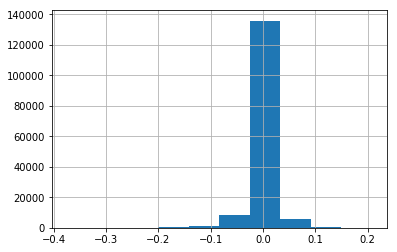

In [93]:
(trial['toxic'] - ideal['toxic']).hist()
plt.savefig('diff.jpeg')

In [69]:
for label in labels:
    ideal[label] = minmax_scale(ideal[label])

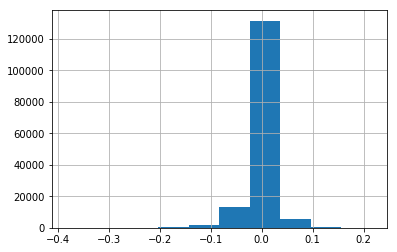

In [47]:
(last_subm['toxic'] - ideal['toxic']).hist()

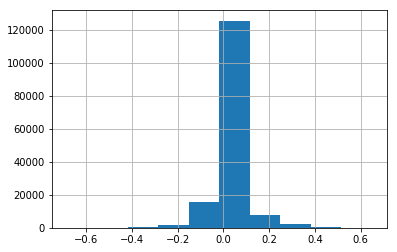

In [49]:
(vic['toxic'] - ideal['toxic']).hist()

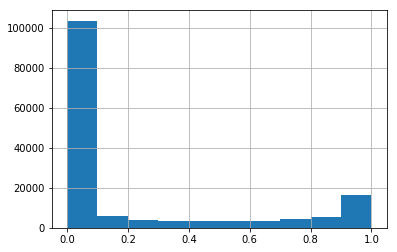

In [33]:
submission['toxic'].hist()

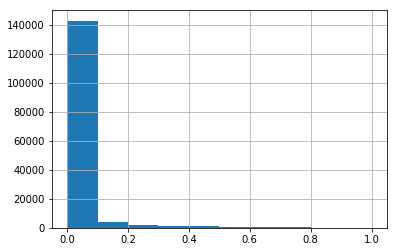

In [22]:
submission['severe_toxic'].hist()

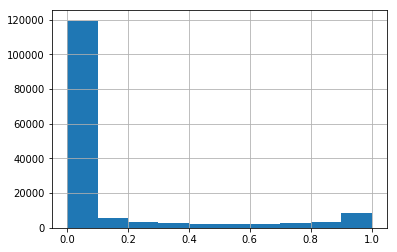

In [23]:
submission['obscene'].hist()

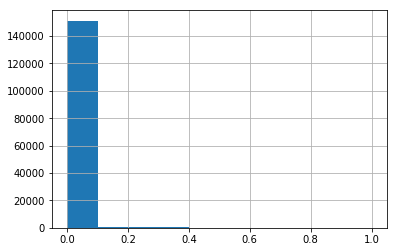

In [24]:
submission['threat'].hist()

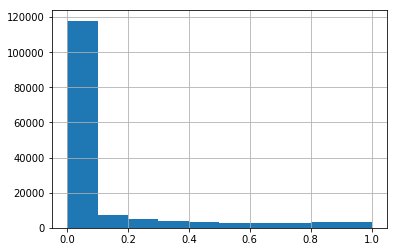

In [25]:
submission['insult'].hist()

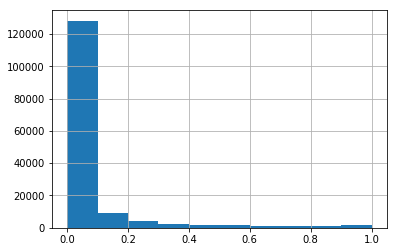

In [26]:
logreg['insult'].hist()

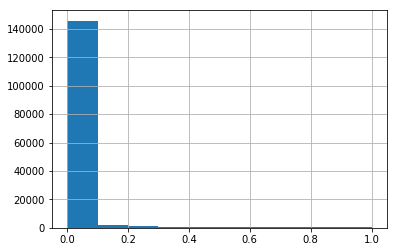

In [27]:
vic['identity_hate'].hist()

In [28]:
final_prediction = submission.copy()
trust_level = 0.985
significance_level = 0.015
mask = final_prediction.loc[:, 'toxic'] > trust_level
final_prediction = final_prediction.where(~mask, other=1)
#mask = final_prediction.loc[:, targets] < significance_level
#final_prediction = final_prediction.where(~mask, other=0)
final_prediction.loc[:, 'id'] = submission['id']
final_prediction

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.952275,0.405018,0.947370,0.134704,0.927115,0.413509
1,0000247867823ef7,0.006378,0.001868,0.002183,0.000898,0.003595,0.002046
2,00013b17ad220c46,0.010290,0.001953,0.005531,0.001153,0.004014,0.002090
3,00017563c3f7919a,0.005869,0.001559,0.002501,0.001250,0.002369,0.001226
4,00017695ad8997eb,0.010208,0.001653,0.003941,0.000966,0.003664,0.001714
5,0001ea8717f6de06,0.007528,0.001918,0.003196,0.001856,0.005008,0.001825
6,00024115d4cbde0f,0.009250,0.001412,0.003728,0.001047,0.004414,0.001744
7,000247e83dcc1211,0.520876,0.003450,0.033440,0.004211,0.092781,0.003844
8,00025358d4737918,0.057552,0.001415,0.017485,0.000824,0.028363,0.002439
9,00026d1092fe71cc,0.005522,0.001141,0.002509,0.000894,0.002788,0.001000


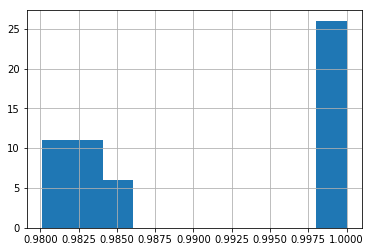

In [31]:
final_prediction[final_prediction['toxic'] > 0.980]['toxic'].hist()

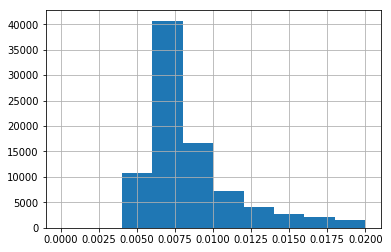

In [33]:
final_prediction[final_prediction['toxic'] < 0.02]['toxic'].hist()

In [34]:
final_prediction.to_csv('submissions/blend_of_12_models_and_logreg.csv', index=False)

In [29]:
submission.to_csv('submissions/blend_of_12_models_and_logreg.csv', index=False)